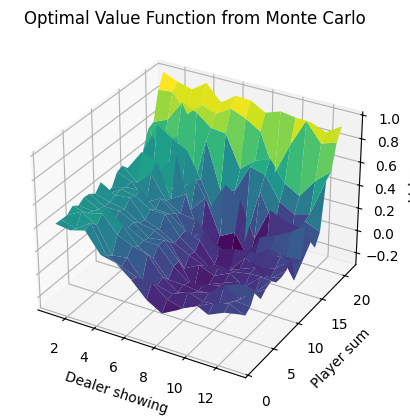

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ModifiedBJ_env import ModifiedBlackJack
from monte_carlo_agent import MonteCarloAgent
from sarsa_agent import SarsaLambdaAgent

# Initialize environment and Monte Carlo agent
env = ModifiedBlackJack()
mc_agent = MonteCarloAgent(env)

# Train the Monte Carlo agent
mc_agent.train(num_episodes=90000)

# Get the optimal value function from Monte Carlo
Q_star = mc_agent.Q

# Plot the optimal value function from Monte Carlo
V = mc_agent.get_value_function()
player_sums = range(1, 22)
dealer_shows = range(1, 14)
V_grid = np.zeros((len(player_sums), len(dealer_shows)))

for p_sum in player_sums:
    for d_show in dealer_shows:
        V_grid[p_sum - 1, d_show - 1] = V[(d_show, p_sum)]

X, Y = np.meshgrid(dealer_shows, player_sums)
fig = plt.figure(20, 10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V_grid, cmap='viridis')
ax.set_xlabel('Dealer showing')
ax.set_ylabel('Player sum')
ax.set_zlabel('Value')
plt.title("Optimal Value Function from Monte Carlo")
plt.show()

1. Axes:
- X-axis (Dealer showing): Represents the card value that the dealer is showing, typically ranging from 1 (Ace) to 10 (Face cards counted as 10) or beyond depending on the specific rules of the game.

- Y-axis (Player sum): Represents the sum of the player's cards, ranging from 0 to 20 in this case. In a game like Blackjack, this would represent the total value of the player's hand.

- Z-axis (Value Function): Represents the expected return (value) for each state, which is a combination of the player’s sum and the dealer’s showing card. The values typically range from negative (indicating a losing expectation) to positive (indicating a winning expectation).

2. Interpretation:
- Surface Peaks: The highest points on the surface (light green to yellow) indicate states where the expected value is high, meaning the player has a good chance of winning from that state. These usually occur when the player has a strong hand, and the dealer shows a weak card.

- Surface Valleys: The lowest points on the surface (dark blue to purple) indicate states where the expected value is low, meaning the player is likely to lose from that state. This often occurs when the player has a low sum, or the dealer shows a high-value card.

- Monte Carlo Simulation: The graph shows the results of using a Monte Carlo method to estimate the value function. Monte Carlo methods are used to simulate many possible game scenarios to estimate the optimal value for each state.

3. Conclusion:
- This plot visually demonstrates how different states (combinations of the player's sum and dealer's visible card) contribute to the expected value in the game, helping in determining the best strategy (e.g., when to hit or stick in Blackjack) based on the calculated value function.

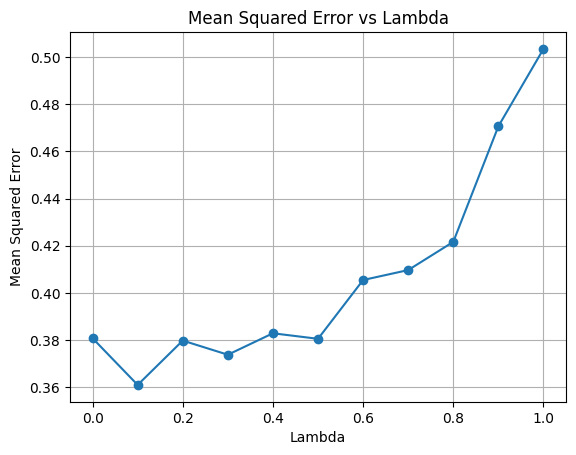

In [14]:
# Initialize Sarsa(λ) agent
sarsa_agent = SarsaLambdaAgent(env)
sarsa_agent.set_Q_star(Q_star)

# Train the Sarsa(λ) agent and compute MSE for different λ values
errors = sarsa_agent.train(num_episodes=1000)

# Convert results to DataFrame
df_mc_results = mc_agent.get_results()
df_sarsa_results = sarsa_agent.get_results()

# Save the results to CSV files
df_mc_results.to_csv('monte_carlo_results.csv', index=False)
df_sarsa_results.to_csv('sarsa_lambda_results.csv', index=False)

# Plot MSE against λ
lambdas, mses = zip(*[(lamb, np.mean(errors_per_lambda)) for lamb, errors_per_lambda in errors])
plt.figure()
plt.plot(lambdas, mses, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Lambda')
plt.grid(True)
plt.show()


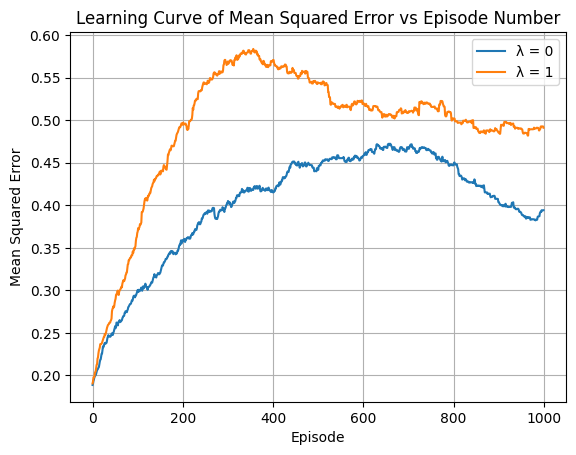

In [6]:
# For λ = 0 and λ = 1, plot the learning curve of MSE against episode number
for lamb in [0, 1]:
    mses_per_episode = [error for lamb_val, errors_per_lambda in errors if lamb_val == lamb for error in errors_per_lambda]
    plt.plot(range(len(mses_per_episode)), mses_per_episode, label=f'λ = {lamb}')

plt.xlabel('Episode')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve of Mean Squared Error vs Episode Number')
plt.legend()
plt.grid(True)
plt.show()

